In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

def load_pointset(path: str) -> ([], []):
    xs = []
    ys = []
    
    with open(path, 'r') as points_file:
        for line in points_file.readlines()[1:]:
            x, y = line.split(" ")
            y.replace("\n", "")
            
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [5]:
def load_spectrum_to_matrix(freqpath: str) -> np.ndarray:
    minfreq = 1.0e36
    maxfreq = 0.0
    
    freqs = []
    
    with open(freqpath, 'r') as spectrum:
        dimension = int(spectrum.readline())
        for line in spectrum.readlines():
            freqs.append(float(line))
            minfreq = min(float(line), minfreq)
            maxfreq = max(float(line), maxfreq)
    
    matrix = np.zeros((dimension, dimension))
    
    for row in range(dimension):
        for col in range(dimension):
            frequency = freqs[row * dimension + col]
            # normalize
            #frequency = (frequency - minfreq) / (maxfreq - minfreq)
            frequency = math.sqrt(frequency / maxfreq);
            matrix[row][col] = frequency
    return matrix

In [23]:
def load_pcf(pcfpath: str) -> ([],[]):
    xs = []
    ys = []
    with open(pcfpath, 'r') as pcffile:
        for line in pcffile.readlines():
            ys.append(float(line))
    xs = range(len(ys))

    return (xs, ys)

In [37]:
def load_radspec(specpath: str) -> ([], []):
    xs = []
    ys = []

    with open(specpath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(", ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

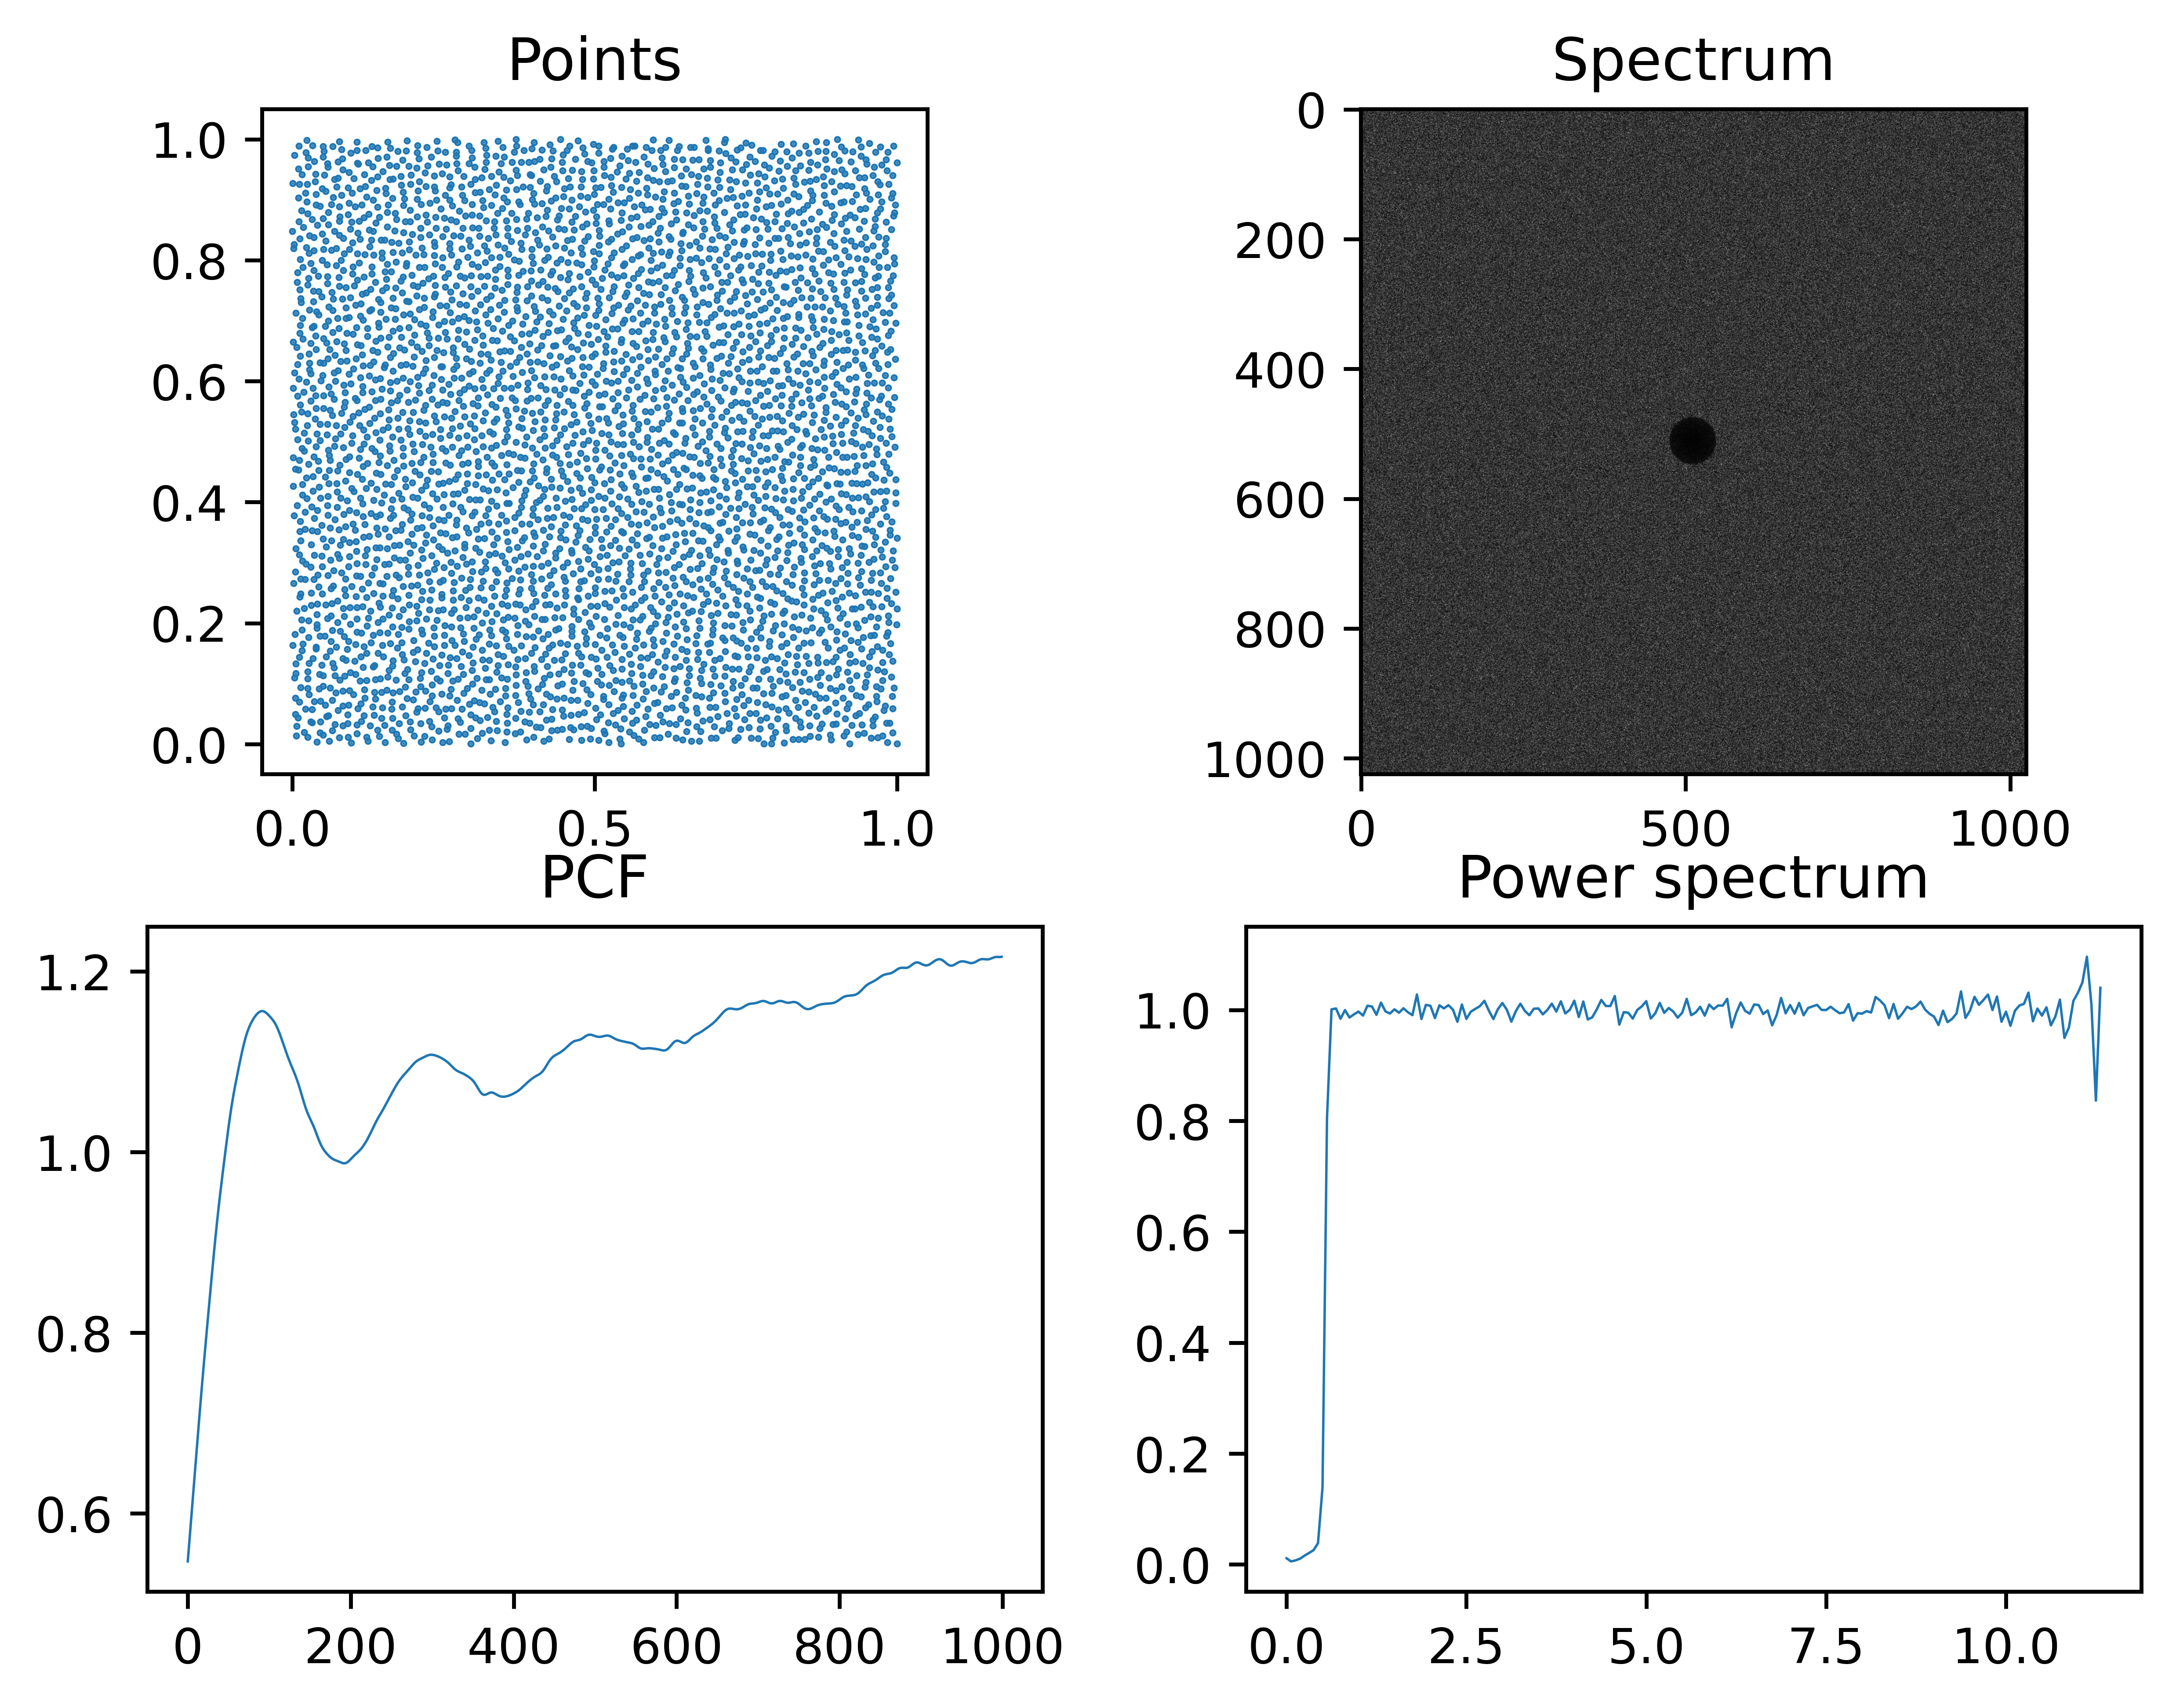

In [49]:

spectrum = load_spectrum_to_matrix("../cmake-build-debug/spectrum.txt")

(px, py) = load_pointset("../result_data/sampled.txt")

(pcfx, pcfy) = load_pcf("../cmake-build-debug/pcf.txt")

(specxs, specys) = load_radspec("../cmake-build-debug/radSpec.txt")

fig, ax = plt.subplots(2, 2)
fig.tight_layout() 
plt.rcParams['figure.dpi'] = 800


ax[0][0].set_aspect(1.0)
ax[0][0].scatter(px, py, s=0.2)
ax[0][0].set_title("Points")

ax[0][1].imshow(spectrum, cmap="gray")
ax[0][1].set_title("Spectrum")

ax[1][0].plot(pcfx, pcfy, linewidth=0.5)
ax[1][0].set_title("PCF")

ax[1][1].plot(specxs, specys, linewidth=0.5)
ax[1][1].set_title("Power spectrum")
plt.savefig("fullfig_generated_utk.png", dpi=800)
plt.show()

In [10]:
plt.close()